In [1]:
import sys
from pathlib import Path

#Define paths for current project
# --- Centralized paths ---
ROOT = Path("..")
DATA = ROOT / "data"
LOGS = ROOT / "logs"
SCRIPTS = ROOT / "scripts"
RESULTS = ROOT / "results"
ALIGN_DIR = RESULTS / "align"
TREE_DIR = RESULTS / "trees"
FIGURES = RESULTS / "figures"


# Set the path to your local optics codebase
optics_path = str(Path.home() / "labdata/users/Oakley/GitHub/optics")
if optics_path not in sys.path:
    sys.path.append(optics_path)

from optics_predictions import run_optics_predictions

# Input FASTA: deduplicated, combined rhodopsin sequences
fasta_file = DATA / "pumphits_culled.fasta"
results_dir = "../results/optics"

# Run OPTICS predictions with options matching the CLI help
optics_df, optics_pred_file = run_optics_predictions(
    input_sequence=fasta_file,
    pred_dir=results_dir,                           # --output_dir
    output="optics_predictions",                    # --prediction_prefix
    model="type-one",                               # --model
    encoding_method="aa_prop",                      # --encoding
    blastp=False,                                   # --blastp
    iden_report="blastp_report.txt",                # --blastp_report
    refseq="bovine",                                # --refseq
    bootstrap=False                                 # --bootstrap
)

print(f"OPTICS predictions saved to: {optics_pred_file}")
optics_df.head()

Processing Sequences: 100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓| 90/90 [00:27<00:00,  3.27seqs/s]


Error: Cached prediction file can't be saved...

YCyR2hit__Nodosilinea_nodulosa__UniRef90_A0AAJ6N6B2	544.6	-	256

YCyR2hit__Pseudanabaena_sp_FACHB_2040__UniRef90_A0A926ZYX4	532.5	-	235

YCyR2hit__Leptolyngbya_sp_FACHB_261__UniRef90_A0A926UF78	528.7	-	229

YCyR2hit__Hassalia_byssoidea_VB512170__UniRef90_A0A846HFU5	537.3	-	233

YCyR2hit__Halorientalis__UniRef90_A0A1G7PUC9	552.4	-	245

YCyR2hit__UnknownTaxon__UniRef90_P29563	546.8	-	259

YCyR2hit__Leptolyngbya_ohadii__UniRef90_UPI000B5A185C	568.0	-	236

YCyR2hit__Aliterella_atlantica_CENA595__UniRef90_A0A0D8ZW42	542.8	-	236

YCyR2hit__Cyanobacteriota__UniRef90_A0A926PVG5	554.1	-	232

YCyR2hit__Microcoleus_sp_FACHB_1515__UniRef90_A0A926U182	534.7	-	233

YCyR2hit__Halorientalis_marina__UniRef90_UPI001FF6C9D7	539.8	-	243

YCyR2hit__unclassified_Leptolyngbya__UniRef90_UPI0016884D19	556.9	-	235

YCyR2hit__Leptolyngbya_sp_NIES_2104__UniRef90_A0A0P4V0S4	557.0	-	236

YCyR2hit__unclassified_Nostoc__UniRef90_A0A252DUV9	538.5	-	234

YCyR2hit__Natron

,Names,Single_Prediction,%Identity_Nearest_VPOD_Sequence,Sequence_Length,Lmax_Hex_Color
0,YCyR2hit__Nodosilinea_nodulosa__UniRef90_A0AAJ...,544.6,-,256,#91ff00
1,YCyR2hit__Pseudanabaena_sp_FACHB_2040__UniRef9...,532.5,-,235,#67ff00
2,YCyR2hit__Leptolyngbya_sp_FACHB_261__UniRef90_...,528.7,-,229,#59ff00
3,YCyR2hit__Hassalia_byssoidea_VB512170__UniRef9...,537.3,-,233,#78ff00
4,YCyR2hit__Halorientalis__UniRef90_A0A1G7PUC9,552.4,-,245,#abff00


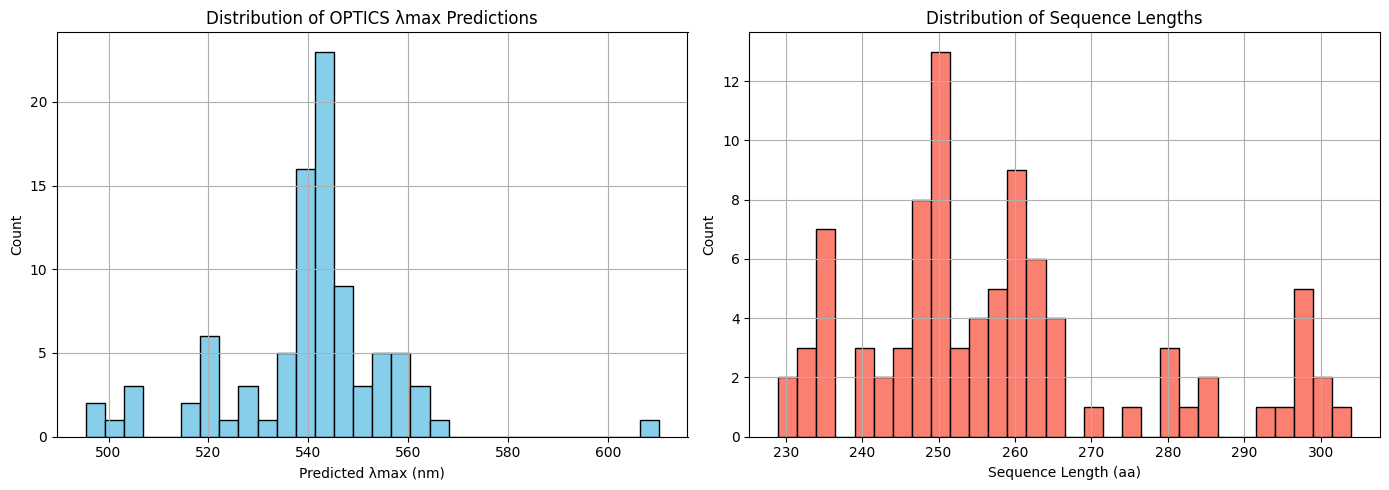

In [2]:
#Plot histograms for sequence length and OPTICS predictions of lambda-max 

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Load the OPTICS results TSV
optics_tsv = RESULTS / "optics/optics_on_optics_predictions_2025-09-01_21-43-10/optics_predictions_predictions.tsv"
df = pd.read_csv(optics_tsv, sep="\t")

# Plot histograms of lambda-max predictions and sequence length
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for lambda-max predictions
df["Single_Prediction"].hist(bins=30, color="skyblue", edgecolor="black", ax=axes[0])
axes[0].set_xlabel("Predicted λmax (nm)")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of OPTICS λmax Predictions")

# Histogram for sequence length
df["Sequence_Length"].hist(bins=30, color="salmon", edgecolor="black", ax=axes[1])
axes[1].set_xlabel("Sequence Length (aa)")
axes[1].set_ylabel("Count")
axes[1].set_title("Distribution of Sequence Lengths")

plt.tight_layout()
plt.show()